In [1]:
#7*1
import numpy as np
import matplotlib.pyplot as plt
data_exp = np.loadtxt('C:/msys64/home/wangy/experiment-control/matlab_new/analysis/scripts/12_2_22_sim/Expdata20221202142327.csv',delimiter=',')
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_5/Overlap2022_12_05_21_03_05_L7_1',delimiter=',')
z =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_5/z_2022_12_05_21_03_05_L7_1',delimiter=',')

In [2]:
data_id = []
for i in data_exp[0,1:]:
    Id = np.argmin(abs(data[0]-i))
    data_id.append(Id)
print(data_exp[0,1:])    
print(data_id)
print(data[0,data_id])

[1.375 1.45  1.525 1.6   1.675 2.1  ]
[135, 137, 138, 140, 141, 149]
[1.368  1.4704 1.5216 1.624  1.6752 2.0848]


In [ ]:
# correct

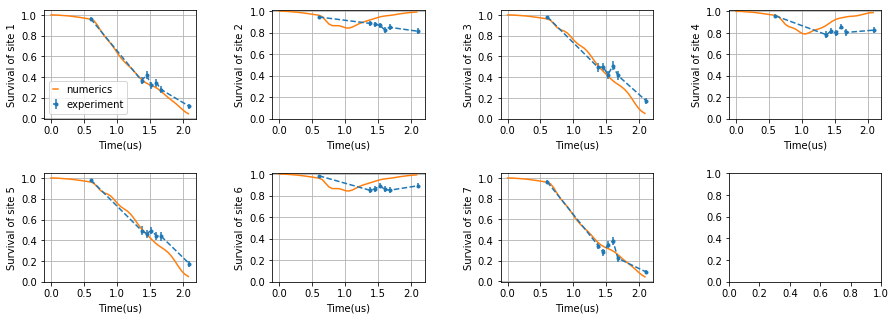

0.07056041556025712


In [3]:
N = 7

fig,ax = plt.subplots(ncols = 4 ,nrows=2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
print((standard_deviation**0.5)/N)

In [9]:
eta = 0.004;
eps = 0.06;
epsp = 0.04;
def n_c(n):
    corrected_measure_vals = eta * eps + (1 - eta) * (eps * (1 - n) + (1 - epsp + eps * epsp) * n)
    return corrected_measure_vals

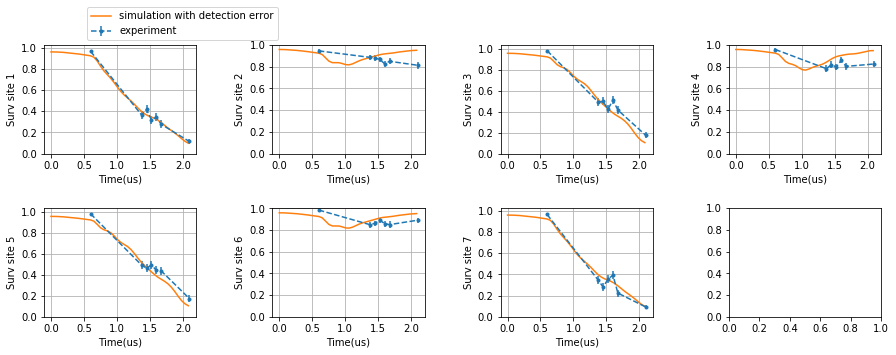

0.0454644606871541


In [10]:
N = 7

fig,ax = plt.subplots(ncols = 4 ,nrows=2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
for i in range(N):
    n = 1-(z[:,i]+1)/2
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n_c(n),label='simulation with detection error')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    standard_deviation +=sum(n_c(n)[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()

    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Surv site '+ str(i+1))
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
plt.show()
print((standard_deviation**0.5)/N)

NameError: name 'np' is not defined